# <center>EXPLORATORY DATA ANALYSIS</center>

## Introduction:

**Problem Statement: Fraud Detection**

Fraud detection is crucial in the financial sector, and EDA aims to uncover insights from the  Fraud Detection dataset.

**Source and context of dataset**

The dataset is derived from two sources - a CSV file named 'data_description.csv' and a Parquet file named 'data.parquet'. These files collectively provide set of features that can be used to train and test a fraud detection model.

**Data Dictionary**

Let's briefly explore key features in the dataset that :
- **Index:** Elapsed time since the first transaction.
- **trans_date_trans_time:** Anonymized features resulting from a PCA transformation to protect user identities.
- **cc_num:** Number of Customers.
- **merchant:** Merchant Name.
- **category:** Category of merchant
- **amt:** Transaction Amount
- **First:** First name of customer
- **Last:** last name of customer
- **Gender:** Gender of customer
etc


## Loading Data

In [1]:
import pandas as pd
file_path = "../data/data_description.csv" 
dc = pd.read_csv(file_path)
df = pd.read_parquet('../data/data.parquet')

In [2]:
dc.head()

,column,description
0,index,Unique Identifier for each row
1,trans_date_trans_time,Transaction DateTime
2,cc_num,Number of Customer
3,merchant,Merchant Name
4,category,Category of Merchant


In [3]:
dc.shape

(23, 2)

In [4]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   column       23 non-null     object
 1   description  23 non-null     object
dtypes: object(2)
memory usage: 500.0+ bytes


In [5]:
dc.describe()

,column,description
count,23,23
unique,23,23
top,index,Unique Identifier for each row
freq,1,1


In [6]:
dc.isnull().values.any()

False

In [7]:
df.shape

(1852394, 22)

In [8]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
df.isnull().values.any()

False

## Data Exploration

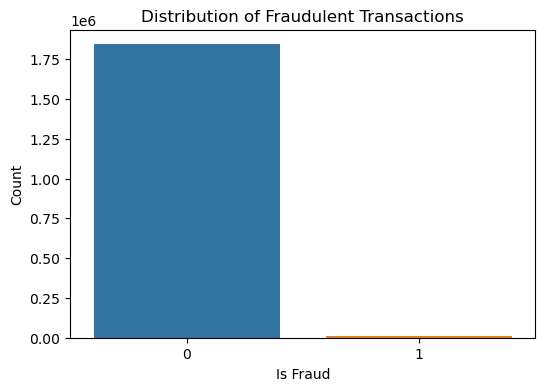

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Explore target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

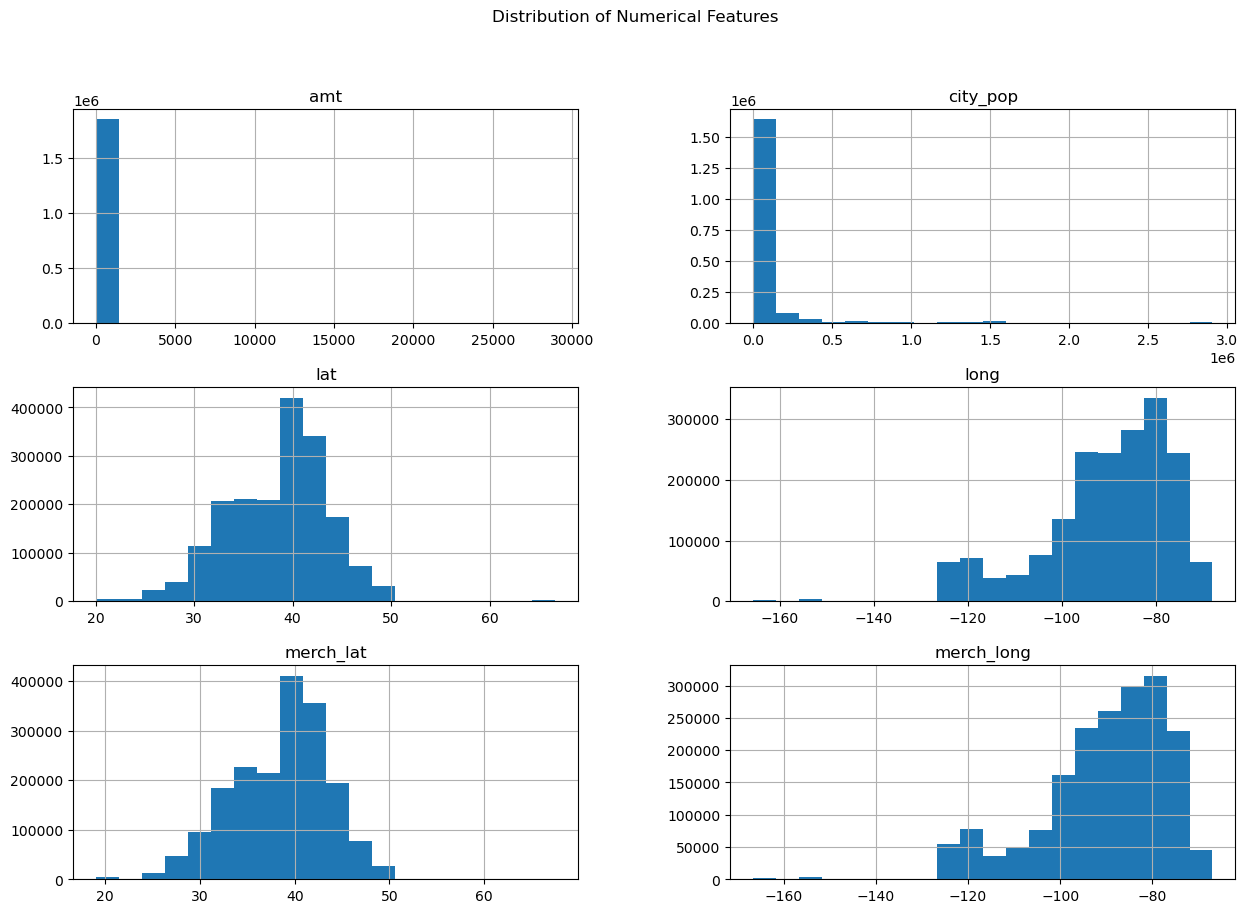

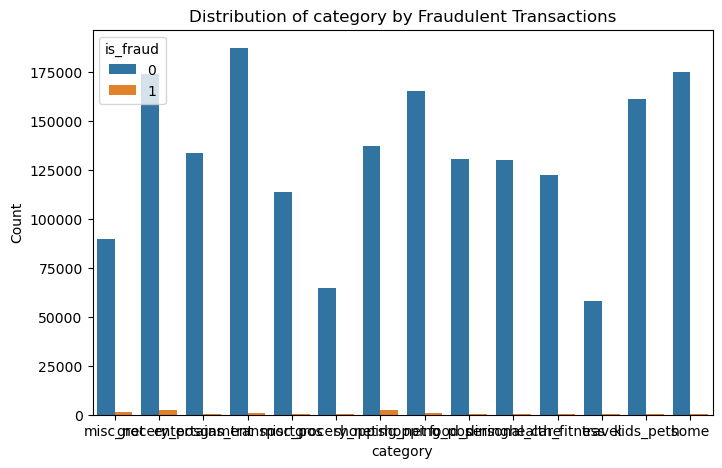

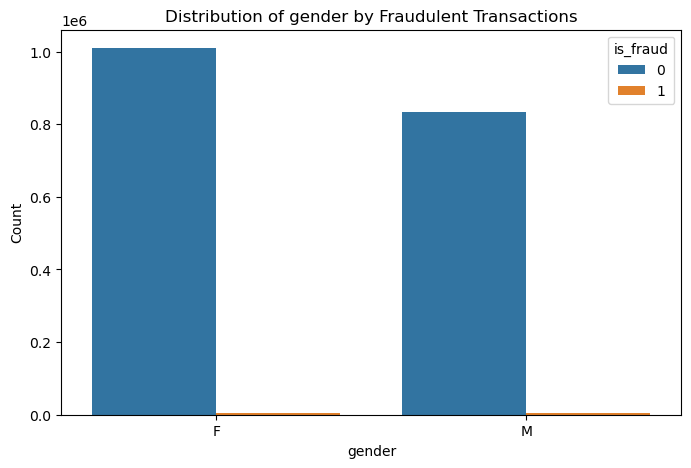

In [11]:
# Explore numerical feature distributions
numerical_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()
# Explore categorical feature distributions
categorical_features = ['category', 'gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, hue='is_fraud')
    plt.title(f'Distribution of {feature} by Fraudulent Transactions')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

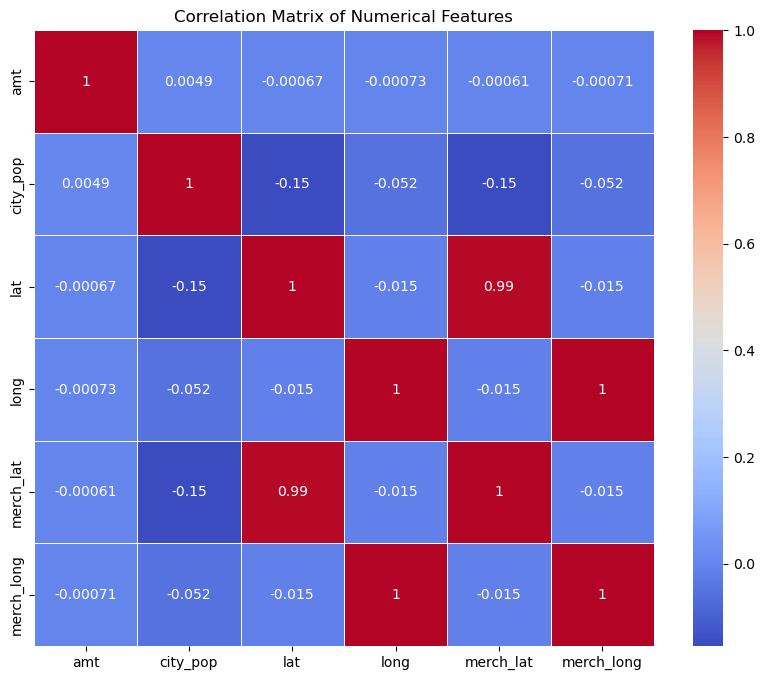

In [12]:
# Analyze correlations between numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## test-train split

In [13]:
#convert the column to date_time format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [14]:
train = df[df['trans_date_trans_time']<=pd.to_datetime('2020-06-21 12:13:37')]
test  = df[df['trans_date_trans_time']>=pd.to_datetime('2020-06-21 12:14:25')]

print('Shape of Dataset =', train.shape, test.shape)
print('Mean Fraud Rate  =', train['is_fraud'].mean(), test['is_fraud'].mean())

Shape of Dataset = (1296675, 22) (555719, 22)
Mean Fraud Rate  = 0.005788651743883394 0.0038598644278853163


In [15]:
train.to_parquet('../data/train.parquet')
test.to_parquet('../data/test.parquet')
#Parquet is a columnar storage file format, highly efficient for analytics

***reasons for choosing split***
After studing the dataset i have chosen split ratio based on a specific date, '2020-06-21 12:13:37'.
where the training data includes transactions up to this certain date and the test data includes transactions from that date onward (time-based split). This is important in fraud detection cases

-*the model is trained on histprical data and tested on future unseen data*

-*By splitting the data based on time,the model will learn from past patterns and test its ability to adapt to new, unseen fraud patterns.*

## summary

Through exploratory data analysis (EDA), we uncovered several key insights into the dataset for fraud detection. The distribution of fraudulent transactions revealed a class imbalance, underscoring the need for careful handling during model training. Feature distributions highlighted varying patterns in numerical and categorical variables, emphasizing the importance of preprocessing to address potential skewness or outliers. Correlation analysis exposed relationships among numerical features, guiding feature selection strategies. The time-based train-test split, grounded in real-world application, aids in training models on historical data and evaluating their efficacy on future instances. Overall, the EDA process illuminated the dataset's nuances, providing a foundation for constructing a robust fraud detection model while highlighting the challenges associated with class imbalance and temporal dynamics.